In [9]:
# 实现一个多变量梯度下降模型
# numpy的 dot 方法, 在第二个参数为行向量时自动将其当做单列向量处理(可能需要维度刚好匹配时才会自动转换, 不清楚内部实现因此仍手动转换维度
# 在内部可使用行向量表示theta需要时再变换, 此处使用列向量可能有空间占用问题?(不太清楚numpy的机制)
import numpy as np

In [1]:
class GDregression:
    def __init__(self, alpha=0.001, maxIterations=5000, jd=0.001, mul=1):
        '''
        初始化一个GDregression
        Params:
            # feathreal_nums - 特征数 
            alpha - 学习速率
            maxIterations - 最大迭代次数
            jd - 需求精确度
            mul - 多项式, 待定功能
        '''
        # self.featureal_nums=featureal_nums
        self.alpha = alpha
        self.maxIterations = maxIterations
        self.jd = jd
        self.mul = mul
        self._costs = []
        
    def _hypothesis(self,ts):
        '''
        使用参数列表来计算该参数对数据的预测结果
        Params:
            ts - 参数, 为2维数组但是每一行只能有一个值, 即类似行向量的转置, 不过ndarray 单行向量转置不会转置为二维\
            需要声明的时候为[[x1, x2, ...xn]]才能够进行转置
        '''
        # 使用添加了 值为1 的列 的数据集
        ret = np.dot(self._data_fill_1, ts)
        return ret   # 返回 一列 ndarray 数组 二维数组
        
    def _fill_1(self, data):
        # 返回添加一列 1 后的特征
        return np.concatenate([np.ones(data.shape[0]).reshape(data.shape[0], 1), data], axis=1)
    
    def _cost(self,ts):
        t = self._hypothesis(ts)
        t = t.reshape(t.shape[0],)
        return np.power((t - self._features), 2).sum()/2/self._data_nums
        #return np.power((self._hypothesis(t1, t2) - self._features), 2).sum()/2/self._data_nums
    
    def fit(self, data, features):
        """
            Params:
                data - 训练集, 需要为二维ndarray
                features - 标签, 需要为一维ndarray
        """
        self._data = data
        # 下面这条语句需要先判断data是二维数组才行
        self._x, self._y = data.shape
        self._feathres_nums = len(data[0])    # 获取特征数目    
        self._data_nums = data.shape[0]      # 获得数据条数
        self._data_fill_1 = self._fill_1(data)     # 补充一列1
        self._features = features 
        self._ts = np.zeros((self._feathres_nums + 1, 1))   # 初始化参数数组全为0 得到一个二维数组表示列数组
        # print(self._ts)
        self._costs.clear()
        ts = self._ts
        for i in range(self.maxIterations):
        #for i in range(2): 小循环测试用
            tp = self._hypothesis(ts)    # 得到预测结果向量
            tp = tp.reshape(tp.shape[0], )    # 将单列二维向量转变为行向量好与特征做运算
            
            # 以下为对应偏导公式
            ch = tp - self._features        # 预测结果与特征的差向量
            ch.reshape(ch.shape[0], 1)
            dot = np.dot(self._data_fill_1.T, ch)    # 二维(data_nums, features)数据, 得到参数加1行
            sumof = self.alpha * dot
            sumof = sumof.reshape(self._feathres_nums+1, 1) / self._feathres_nums  # 转换为列向量 与theta做运算
            
            tts = ts - sumof 
            ts = tts
            cc = self._cost(ts)
            self._ts = ts
            if len(self._costs) == 0:
                pass
            else:
                if cc == self._costs[-1]:
                    break
            self._costs.append(cc)    # 存入损失值
            if cc <= self.jd:
                break
        
    
    def predict(self, data):
        data = self._fill_1(data)    # 填充 "1" 列
        ret = np.dot(data, self._ts)
        ret = np.array([sum(x) for x in ret])
        return ret   # 返回 一列 ndarray 数组

testdata = [[1], [3], [5]]
预测值为: [20.831888   26.9606938  33.08949959]


估计的参数为: 
 [[17.7674851]
 [ 3.0644029]]


损失值如下:


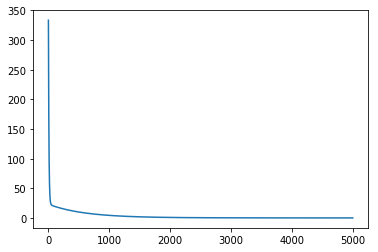

In [95]:
import matplotlib.pyplot as plt
sr = GDregression()
d1 = np.array([[1], [2], [3], [4], [5]])
d2 = np.array([1, 2, 3, 4, 5]) * 3 + 18
 # 伪造一个数据
sr.fit(d1, d2)
testdata = np.array([[1], [3], [5]])
print('testdata = [[1], [3], [5]]')
print('预测值为:',sr.predict(testdata))
print('\n')
print('估计的参数为: \n',sr._ts)
print('\n')
print('损失值如下:')
plt.plot(np.arange(0, len(sr._costs), 1), sr._costs)

In [123]:
d1 = np.array([1, 2])
d2 = np.array([2, 2])
d3 = np.array([4, 8])
d4 = np.array([2, 1])
data = np.array([d1, d2, d3, d4])
fea = np.array([9, 11, 33, 8])   # 制作一个 y = 2x_0 + 3x_1 + 1 的数据集

In [124]:
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# data = std.fit_transform(data)  做了特征缩放之后得到的参数值会不一样

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [125]:
s2 = GDregression(jd=0.01)
s2.fit(data, fea)

[[15.24931455]
 [ 3.19574382]
 [ 7.30160797]]
损失值如下:


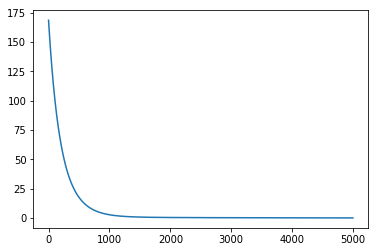

In [126]:
print(s2._ts)    # 哈哈hhhh效果还行
print('损失值如下:')
plt.plot(np.arange(0, len(s2._costs), 1), s2._costs)

In [127]:
len(s2._costs)

5000

In [128]:
s2._ts  # 还是有出入 但是很不错了hhh

array([[15.24931455],
       [ 3.19574382],
       [ 7.30160797]])

In [121]:
# 没有做特征缩放

In [122]:
# 时间 2019年9月8日19:06:18